# A0.4 Damped vibration - direct fitting method
by H cyan

huangzw29@mail2.sysu.edu.cn

2021.4.22

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft,ifft

## EXP1 frequency

### Import data

*wrong*

In [3]:
# df = pd.read_csv(r'Steel_rule_data\Raw Data130.csv')
# df.head(10)
# t_origin = np.array(df['Time (s)'][100:])
# a_origin = np.array(df['Linear Acceleration z (m/s^2)'][100:])

*correct*

In [4]:
df = pd.read_csv(r'Steel_rule_data\Raw Data130.csv')
df.drop(df.head(100).index, inplace=True)
df['Time (s)'] = df['Time (s)'] - df.iloc[0,0]
df.reset_index(drop=True, inplace=True)
print(df.head(10))

t_origin = np.array(df['Time (s)'])
a_origin = np.array(df['Linear Acceleration z (m/s^2)'])

   Time (s)  Linear Acceleration x (m/s^2)  Linear Acceleration y (m/s^2)  \
0  0.000000                      -1.913950                      -0.322573   
1  0.019318                      -0.990811                       0.006699   
2  0.038660                       2.604450                       0.486112   
3  0.057978                       2.970226                      -0.579575   
4  0.077619                       2.856419                      -0.449000   
5  0.096950                       2.010081                       0.521955   
6  0.116267                      -1.029576                      -0.266334   
7  0.135585                      -1.235783                       0.017877   
8  0.154927                       1.388735                       0.386634   
9  0.174244                       2.508473                      -0.261857   

   Linear Acceleration z (m/s^2)  Absolute acceleration (m/s^2)  
0                     -19.882177                      19.976692  
1                   

### Original curve

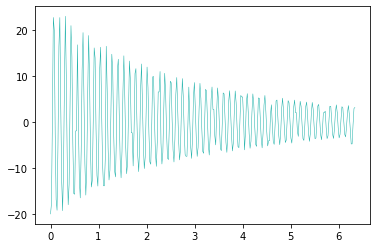

In [5]:
plt.plot(t_origin, a_origin, linewidth=0.5, color='lightseagreen')

### Fitting

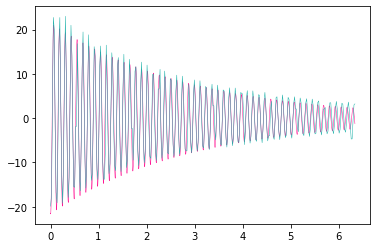

In [6]:
def a_t(t, A1, bt, omg, A4, A5):
    return A1 * (omg**2) * np.exp(-bt*t) * np.cos(omg*t + A4) + A5

# param_bounds=([-1, -1, 40, 0, -1], [1, 1, 50, 4, 1])
# popt, pcov = curve_fit(a_t, t_origin, a_origin, bounds=param_bounds)
popt, pcov = curve_fit(a_t, t_origin, a_origin)

t_dense = np.linspace(t_origin.min(), t_origin.max(), 10000)

avals = a_t(t_dense, popt[0], popt[1], popt[2], popt[3], popt[4])
Omega = popt[2]
beta = popt[1]

plt.plot(t_dense, avals, linewidth=0.5, color='deeppink')
plt.plot(t_origin, a_origin, linewidth=0.5, color='lightseagreen')

In [7]:
print('omega: '+str(Omega), 'T: '+str(2*np.pi/Omega), 'beta: '+str(beta))

omega: 51.39379608098396 T: 0.12225571540344742 beta: 0.34808277396052206


In [8]:
print(popt)

[ 8.17162146e-03  3.48082774e-01  5.13937961e+01  3.01350227e+00
 -5.71246293e-02]


### Subplot

Text(0.5, 0.05, 'Fig.1 Direct Fitting. L=130mm')

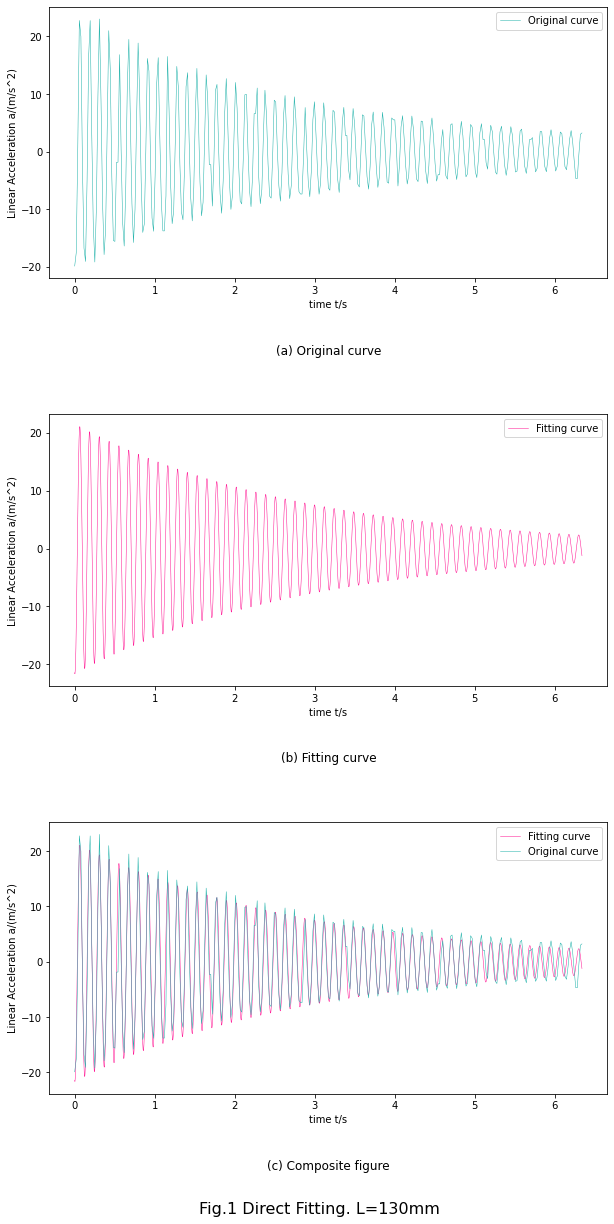

In [9]:
fig, a =  plt.subplots(3,1,figsize=(10, 20))

a[0].plot(t_origin, a_origin, linewidth=0.5, color='lightseagreen', label='Original curve')

a[0].set_xlabel('time t/s')
a[0].set_ylabel('Linear Acceleration a/(m/s^2)')
a[0].set_title('(a) Original curve', y=-0.3)
a[0].legend()


a[1].plot(t_dense, avals, color='deeppink', linewidth=0.5, label='Fitting curve')

a[1].set_xlabel('time t/s')
a[1].set_ylabel('Linear Acceleration a/(m/s^2)')
a[1].set_title('(b) Fitting curve', y=-0.3)
a[1].legend()


a[2].plot(t_dense, avals, color='deeppink', linewidth=0.5, label='Fitting curve')
a[2].plot(t_origin, a_origin, linewidth=0.5, color='lightseagreen', label='Original curve')


a[2].set_xlabel('time t/s')
a[2].set_ylabel('Linear Acceleration a/(m/s^2)')
a[2].set_title('(c) Composite figure', y=-0.3)
a[2].legend()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
plt.suptitle('Fig.{} Direct Fitting. L={}mm'.format(1, 130), y=0.05, fontsize=16)

52.0


Text(0, 0.5, '|Y(freq)|')

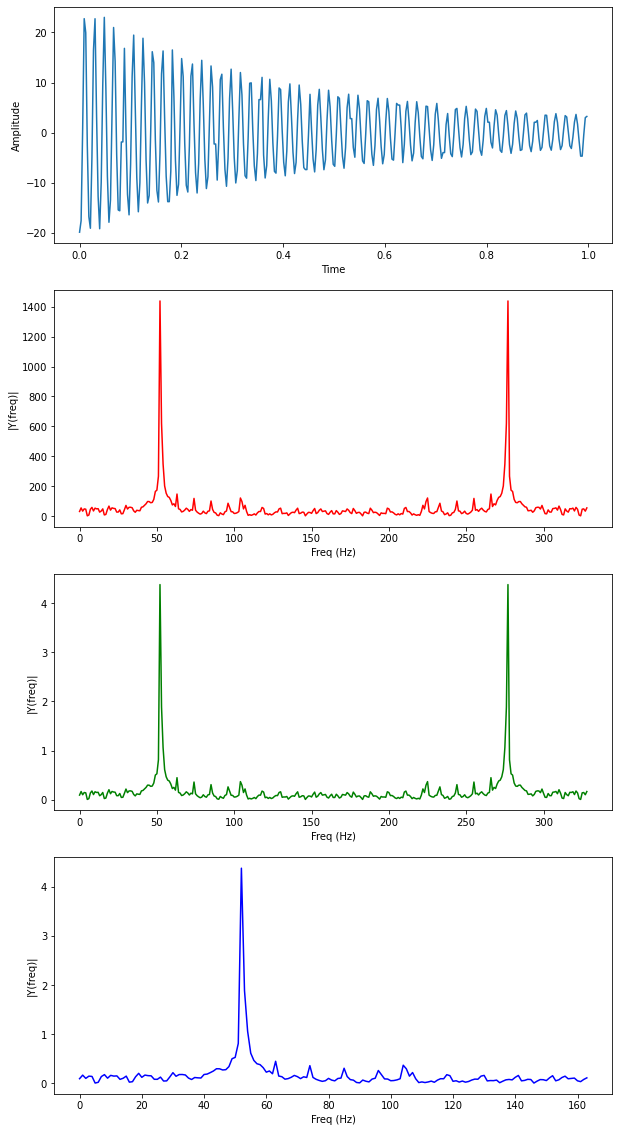

In [30]:
Fs = len(a_origin);                 # sampling rate采样率
Ts = 1.0/Fs;                # sampling interval 采样区间
t = np.arange(0,1,Ts)       # time vector,这里Ts也是步长


y = a_origin
n = len(y)                  # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T                   # two sides frequency range
frq1 = frq[range(int(n/2))] # one side frequency range

YY = np.fft.fft(y)          # 未归一化
Y = np.fft.fft(y)/n         # fft computing and normalization 归一化
Y1 = Y[range(int(n/2))]

for i in range(len(frq1)):
    if abs(Y1).tolist()[i] == abs(Y1).max():
        print(frq1[i])



fig, ax =  plt.subplots(4,1,figsize=(10, 20))

ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')

ax[1].plot(frq,abs(YY),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

ax[2].plot(frq,abs(Y),'g')  # plotting the spectrum
ax[2].set_xlabel('Freq (Hz)')
ax[2].set_ylabel('|Y(freq)|')

ax[3].plot(frq1,abs(Y1),'b') # plotting the spectrum
ax[3].set_xlabel('Freq (Hz)')
ax[3].set_ylabel('|Y(freq)|')


